<a href="https://colab.research.google.com/github/parasgupta1995/Machine_learning_Project_Bike_sale_Prediction-Regression-/blob/main/machine_learning_project_bike_sharing_demand_prediction_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Bike Sharing Demand Prediction



##### **Project Type**    - Regression
##### **Contribution**    - Individual
##### **Team Member-** Paras Gupta


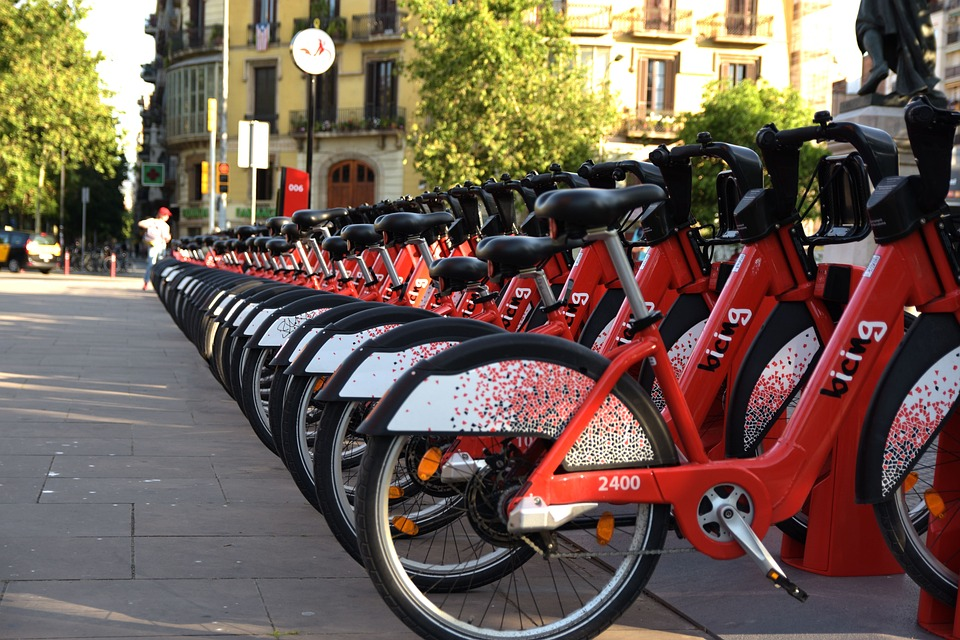

# **Project Summary -**

* Goal: Improve public mobility and convenience in metropolitan areas through bike-sharing programs.
* Challenge: Ensure a consistent supply of bikes for rental in automated bike-sharing systems with bikes rented and returned at various locations.
* Solution: Use historical data on factors such as temperature and time to predict demand for the bike-sharing program in Seoul.
* Dataset: Contains approximately 8760 records and 14 attributes.
* Project Steps:
 * Import the dataset and necessary libraries.
 * Conduct exploratory data analysis (EDA).
 * Remove outliers and null values from the raw data and treat it.
 * Transform the data to ensure compatibility with machine learning models.
 * Handle target class imbalance using square root normalization.
 * Now the cleaned and scaled data is passed to the 6 different models.
 * Evaluate each model using metrics and tune hyperparameters to ensure the right parameters were passed to the model.
* Important Metrics: R2 score and RMSE score.
* R2 Score: Scale-independent, allows for direct comparisons of model performance regardless of the scale of the target variable.

# **GitHub Link -**

https://github.com/parasgupta1995/Machine_learning_Project_Bike_sale_Prediction-Regression-

# **Problem Statement**


To improve mobility and convenience in metropolitan areas, bike rentals are becoming increasingly popular. However, ensuring timely access to rental bikes is crucial to reducing wait times and providing a consistent supply of rental bikes. Therefore, the expected hourly bicycle count is of particular importance.

Bike sharing systems use a network of locations to automate membership, rentals, and bike returns. This allows individuals to rent bikes from one location and return them to another or the same location as needed, with the process overseen by a citywide network of automated stores.

This dataset is focused on predicting the demand for Seoul's Bike Sharing Program based on historical usage patterns, including factors such as temperature, time, and other relevant data.





# ***Let's Begin !***

## ***1. Know Your Data***

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Reading CSV file  
df=pd.read_csv('/content/drive/MyDrive/Capstone project/Bike sharing demand prediction/SeoulBikeData (1).csv', encoding= 'unicode_escape')

## 2. ***EDA***

In [ ]:
df.Seasons.unique()

array(['Winter', 'Spring', 'Summer', 'Autumn'], dtype=object)

In [ ]:
# To view all the column 
pd.set_option('max_columns',0)

In [ ]:
# Checking for the null values in dataframe
df.isnull()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8756,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8757,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8758,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [ ]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


### ***1.1:Data Cleaning***

In [ ]:
# Converting Temperature and Dew point temperature from degree celsius to kelvin (absolute scale)
df[['Temperature(°C)','Dew point temperature(°C)']]=df[['Temperature(°C)','Dew point temperature(°C)']].agg(lambda x: x+273)

In [ ]:
# Convert data type of Date Column from object to datetime with the help of .to_datetime method
df['Date']=pd.to_datetime(df['Date'],dayfirst=True)

In [ ]:
# Extract date from the Date column
import datetime
df['Month']=df['Date'].dt.strftime('%b')
df['day']=df['Date'].dt.strftime('%d')

### ***1.2.Data Visualization***

In [ ]:
# Sun burst chart expressing Total number of bike rented in a each Seasons as well as in each Month
import plotly.figure_factory as ff
import plotly.express as px
fig = px.sunburst(df, path=['Seasons', 'Month'], values='Rented Bike Count')
fig.show()

In [ ]:
#Total Number of bike rented in a given Hour
total_bike_rented_each_hour=df[['Rented Bike Count','Hour']].groupby(by='Hour').apply(sum).drop('Hour',axis=1).reset_index
fig = px.bar(total_bike_rented_each_hour(), x="Hour", y="Rented Bike Count", title="Rented bike count each hour in a year",text_auto='.2s',
             color_continuous_scale=px.colors.sequential.Viridis)
fig.update_layout(
    xaxis = dict(
        tickmode = 'linear',
        tick0 = 0,
        dtick = 1
    )
)
fig.show()

<AxesSubplot:>

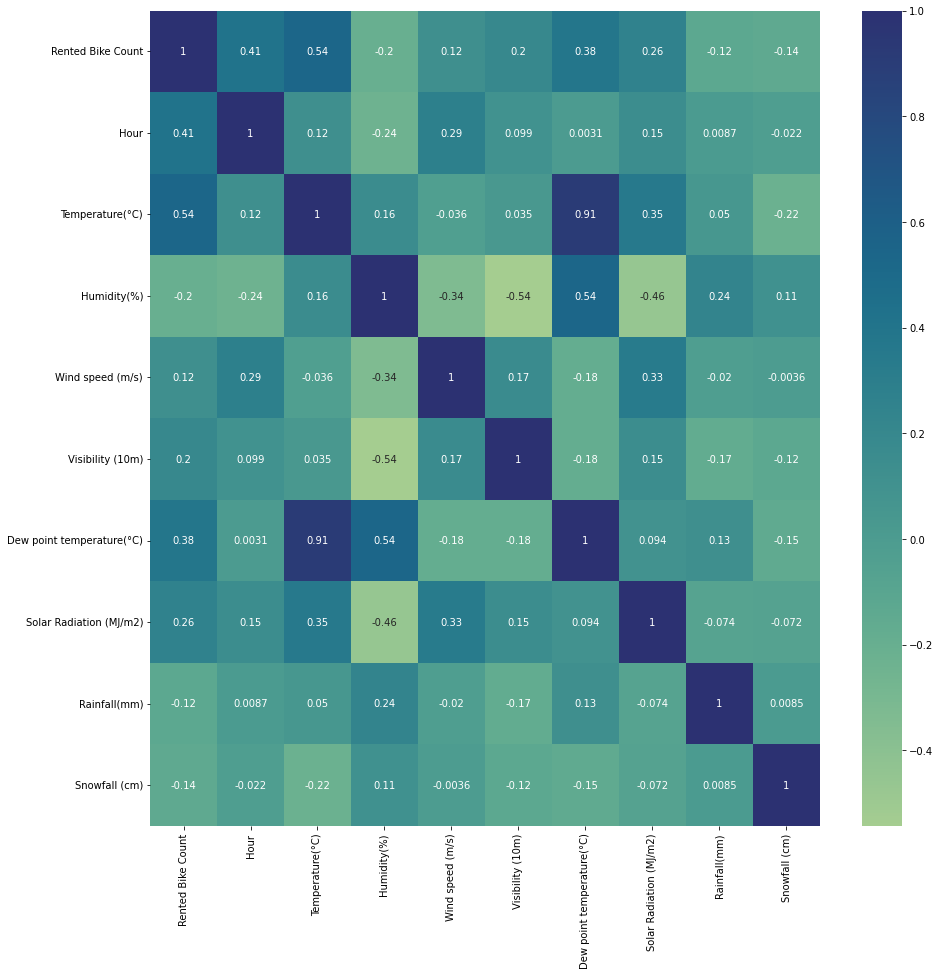

In [ ]:
# Heatmap
fig = plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(),cmap='crest',annot=True)

### ***1.3. Distribution of each column in the dataframe:***

In [ ]:
# For Rented Bike Count column
fig = px.histogram(df, x='Rented Bike Count')
fig.show()

In [ ]:
# For Temperature Column
group_labels = ['Temperature(°C)']
fig = ff.create_distplot([df['Temperature(°C)']], group_labels,bin_size=1,show_rug=False)
fig.show()

In [ ]:
# For Humidity Column
fig = ff.create_distplot([df['Humidity(%)']],['Humidity(%)'],bin_size=2,show_rug=False)
fig.show()

In [ ]:
# For Wind speed (m/s) column
fig = ff.create_distplot([df['Wind speed (m/s)']],['Wind speed (m/s)'],bin_size=0.2,show_rug=False)
fig.show()

In [ ]:
# For Visibility column
fig = ff.create_distplot([df['Visibility (10m)']], ['Visibility (10m)'],bin_size=30,show_rug=False)
fig.show()

In [ ]:
# For Dew point Temperature
fig = ff.create_distplot([df['Dew point temperature(°C)']],['Dew point temperature(°C)'],bin_size=1,show_rug=False)
fig.show()

In [ ]:
# For Solar Radiation  
fig = ff.create_distplot([df['Solar Radiation (MJ/m2)']],['Solar Radiation (MJ/m2)'],bin_size=0.1,show_rug=False)
fig.show()

In [ ]:
# For Rainfall
fig = ff.create_distplot([df['Rainfall(mm)']],['Rainfall(mm)'],bin_size=1,show_rug=False)
fig.show()

In [ ]:
# For Snowfall
import plotly.express as px
fig = px.histogram(df, x='Snowfall (cm)')
fig.show()

In [ ]:
# For Season
fig = px.histogram(df, x='Seasons')
fig.show()

In [ ]:
# For holiday 
fig = px.histogram(df, x='Holiday')
fig.show()

In [ ]:
# For Functioning Day
fig = px.histogram(df, x='Functioning Day')
fig.show()




---



---


## ***3. Outlier Detection and Treatment with Capping:***
---


Outlier are present in the three column (viz; Rented Bike Count,Wind speed, 
solar radiation) while for rainfall and snownfall column, sparsecity was found(i.e. maximum number of sample are zero). 


1.   Capping method is used for treatment of oultlier.
2.   For value greater than max value **(75 percentile+1.5*IQR)** ; they are capped by the max value.

1.  For value lesser than min value **(25percentile-1.5*IQR)** ; they are capped by the min value.





---



---



In [ ]:
#For each column,Box plot is plotted inorder to visualize the outlier 
col_names=list(df.columns)
for i in col_names:
  fig = px.box(df, y=i)
  fig.show()


In [ ]:
# Define function for the calculation of maximum and minimum value for column based on percentile method 
def outlier_(dataframe):
  percentile_25=dataframe.quantile(0.25)
  percentile_75=dataframe.quantile(0.75)
  iqr=percentile_75-percentile_25
  max=percentile_75+1.5*iqr
  min=percentile_25-1.5*iqr
  dataframe=np.where(dataframe>max,max,np.where(dataframe<min,min,dataframe))
  return dataframe;


In [ ]:
# Apply the above define function on the column where outliers are present
lis=['Rented Bike Count','Wind speed (m/s)','Solar Radiation (MJ/m2)']

for i in range(len(lis)):
  df[lis[i]]=outlier_(df[lis[i]])

for i in lis:
  fig = px.box(df, y=i)
  fig.show()



---

##***4.Skewness Checking and Removal***: 
***For checking sknewness df.skew() method is used:***

*   If the value is greater than zero then it is right skewed while the value is lesser than zero then it is left skewed.
  
*   For the right skewed column log(1+p) transformation while in case of left skewed column square transformation is applied respectively. 


---



In [ ]:
# df.skew() method is used to check the skewness in a column and a dictionary is created, with column name as key while value as skewness in the corresponding column

col=[ 'Hour', 'Temperature(°C)', 'Humidity(%)','Wind speed (m/s)', 'Visibility (10m)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']

col_skewness=[]

for i in col:
  col_skewness.append(df[i].skew())
  
skew_dict=dict(zip(col,col_skewness))

In [ ]:
# For Right skew, Log1p transformation where for left skew, square transformation is used
for i in skew_dict.keys():
  if -0.2<=skew_dict.get(i)<=0.2:
    pass
  elif skew_dict.get(i)>0.2:
    df[i]=np.log1p(df[i])
  else:
    df[i]=np.square(df[i]) 

(array([1419.,  655.,  563.,  457.,  439.,  381.,  397.,  428.,  594.,
        3427.]),
 array([7.2900000e+02, 4.0065610e+05, 8.0058320e+05, 1.2005103e+06,
        1.6004374e+06, 2.0003645e+06, 2.4002916e+06, 2.8002187e+06,
        3.2001458e+06, 3.6000729e+06, 4.0000000e+06]),
 <BarContainer object of 10 artists>)

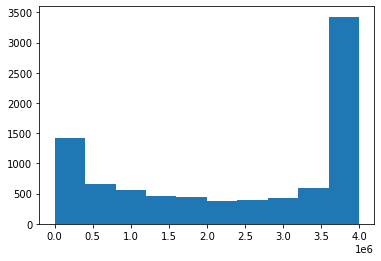

In [ ]:
plt.hist(df['Visibility (10m)'])

(array([4955.,  418.,  359.,  368.,  299.,  362.,  388.,  274.,  357.,
         980.]),
 array([0.        , 0.12014697, 0.24029393, 0.3604409 , 0.48058787,
        0.60073484, 0.7208818 , 0.84102877, 0.96117574, 1.08132271,
        1.20146967]),
 <BarContainer object of 10 artists>)

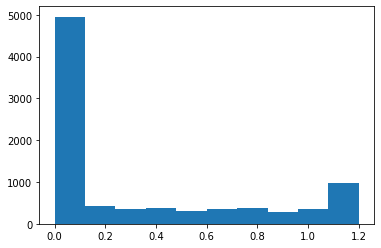

In [ ]:
plt.hist(df['Solar Radiation (MJ/m2)'])

(array([ 123.,  430.,  579., 1086., 1555., 1350., 1252., 1086.,  762.,
         537.]),
 array([0.        , 0.1686399 , 0.33727979, 0.50591969, 0.67455958,
        0.84319948, 1.01183937, 1.18047927, 1.34911916, 1.51775906,
        1.68639895]),
 <BarContainer object of 10 artists>)

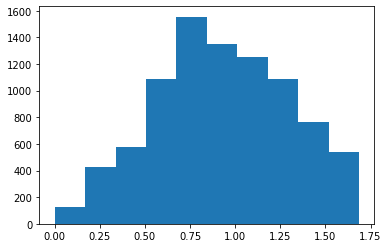

In [ ]:
plt.hist(df['Wind speed (m/s)'])

(array([8.323e+03, 1.890e+02, 6.600e+01, 6.900e+01, 4.200e+01, 3.200e+01,
        1.800e+01, 1.000e+01, 9.000e+00, 2.000e+00]),
 array([0.        , 0.35835189, 0.71670379, 1.07505568, 1.43340758,
        1.79175947, 2.15011136, 2.50846326, 2.86681515, 3.22516704,
        3.58351894]),
 <BarContainer object of 10 artists>)

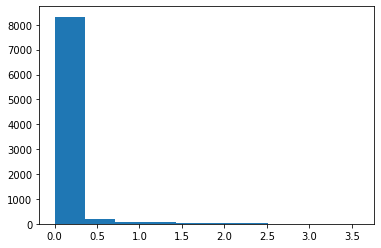

In [ ]:
plt.hist(df['Rainfall(mm)'])



---



---


## ***5. Preprocessing:***

---




*   Independent and dependent feature has been separated from the dataset,after this independent and dependent feature is stored in x1 and y1 variable.
*   First, x1 and y1 variable are split into train and test dataset(***inorder to avoid any leakage of data***) by the **train_test_split** method (from sklearn.model_selection library) with a test size of 20%.


*   Since in the dataset there were categorical feature, so we need encode those categorical feature. '**Hour**', '**seasons**' are cardinal feature while '**Holiday**', '**Functionin Day**' are ordinal feature. 
*   We have import '**OneHotEncoder**' and '**OrdinalEncoder**' from  "**sklearn.preprocessing**" library to encode the cardinal and ordinal feature respectively.


*   "**ColumnTransformer**" is import from **"sklearn.compose"** inorder to apply the onehot and ordinal encoding successively on the train and test dataset.


---


---










In [ ]:
x1=df.loc[:,['Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)',
            'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons', 'Holiday', 'Functioning Day']]
y1=df['Rented Bike Count']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.2,random_state=22)

In [ ]:
col_onehotencoder=['Hour','Seasons']
col_ordinalencoder=['Holiday','Functioning Day']

In [ ]:
col=list(x1.columns)[1:-3]
col

['Temperature(°C)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)']

In [ ]:
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder,StandardScaler
from sklearn.compose import ColumnTransformer
col_trans=ColumnTransformer(transformers=[('op1',OneHotEncoder(sparse=False,drop='first',dtype=int,handle_unknown='ignore'),col_onehotencoder),
                                          ('op2',OrdinalEncoder(categories=[['No Holiday','Holiday'],['No','Yes']]),col_ordinalencoder),
                                          ('op3',StandardScaler(),col)],
                            remainder='passthrough')

In [ ]:
x_train=col_trans.fit_transform(x_train)

x_test=col_trans.transform(x_test)

In [ ]:
x_train_df=pd.DataFrame(x_train)

x_test_df=pd.DataFrame(x_test)

In [ ]:
column_name=[ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 'Spring', 'Summer', 'Autumn',
             'Holiday','Functioning Day','Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)',
            'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']

x_train_df.columns=column_name

x_test_df.columns=column_name

In [ ]:
x_train_df.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,Spring,Summer,Autumn,Holiday,Functioning Day,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,-0.333169,-0.893549,0.535079,1.036217,-0.754299,-0.200717,-0.197659
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.389826,-1.089746,1.660838,0.500514,1.727007,-0.200717,-0.197659
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,-1.253216,0.528884,-0.650448,1.023010,-0.754299,-0.200717,-0.197659
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.692824,0.087439,-0.935460,-0.990290,0.116443,-0.200717,-0.197659
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,-0.642640,1.166526,-0.935460,-1.584697,-0.754299,-0.200717,-0.197659


## ***6. Models:***

### ***6.1.Linear Regression Model***

In [ ]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [ ]:
lr.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_pred_train=lr.predict(x_train)

In [ ]:
from sklearn.metrics import r2_score,mean_squared_error
train_r2_lr=r2_score(y_train,y_pred_train)

In [ ]:
# Function to calculate Adjusted R2 score
def adj_r2_score(y_act,y_pred,k):
  # k = num of independent feature
  n=y_act.shape[0] #number of Observation
  r2=r2_score(y_act,y_pred)
  adj_r2_score=1-(((n-1)/(n-k-1)*(1-r2)))
  return adj_r2_score

In [ ]:
def metrics(y_act,y_pred,k):
  # k = num of independent feature
  r2=r2_score(y_act,y_pred)
  mse=mean_squared_error(y_act,y_pred)
  adj_r2=adj_r2_score(y_act,y_pred,k)
  return (mse,r2,adj_r2)

In [ ]:
# Prediction for X-test
y_pred_lr=lr.predict(x_test)

In [ ]:
# For X-test
lr_mse,lr_r2,lr_adj_r2=metrics(y_test, y_pred_lr,35)
lr_mse,lr_r2,lr_adj_r2

(127915.85197700416, 0.6789110044123924, 0.6723619864371206)

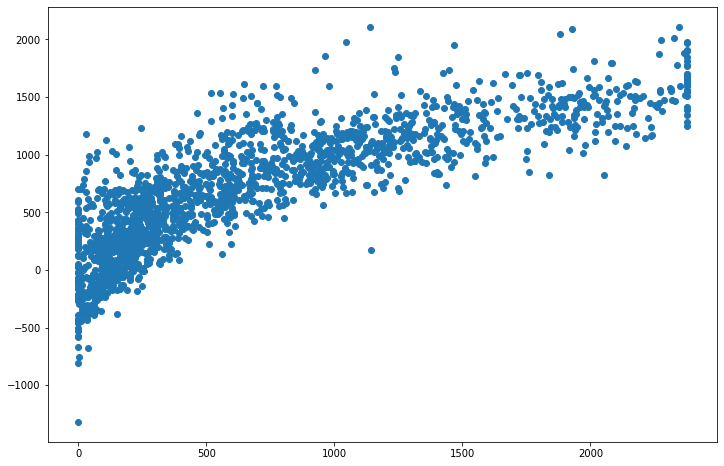

In [ ]:
plt.figure(figsize=(12,8))
plt.scatter(y_test, y_pred_lr)

### ***6.2. Ridge Regression***

In [ ]:
from sklearn.linear_model import Ridge
ridge=Ridge(alpha=0.001,random_state=0)
ridge.fit(x_train,y_train)

Ridge(alpha=0.001, random_state=0)

In [ ]:
train_r2_ridge=ridge.score(x_train,y_train)

In [ ]:
y_pred_ridge=ridge.predict(x_test)

In [ ]:
ridge_mse,ridge_r2,ridge_adj_r2=metrics(y_test,y_pred_ridge,k=x_test.shape[1])
ridge_mse,ridge_r2,ridge_adj_r2

(127915.83858757398, 0.6789110380219773, 0.6723620207322157)

### ***6.3. Lasso Regression***

In [ ]:
from sklearn.linear_model import Lasso
lasso  = Lasso(alpha=0.001 , max_iter= 3000,random_state=0)

lasso.fit(x_train, y_train)

Lasso(alpha=0.001, max_iter=3000, random_state=0)

In [ ]:
train_r2_lasso=lasso.score(x_train, y_train)

In [ ]:
y_pred_lasso=lasso.predict(x_test)
lasso_mse,lasso_r2,lasso_adj_r2=metrics(y_test,y_pred_lasso,k=x_test.shape[1])
lasso_mse,lasso_r2,lasso_adj_r2

(127915.56893131536, 0.6789117149017846, 0.6723627114178466)

***6.3.1. HYPERPARAMETER TUNING FOR LASSO AND RIDGE***

1.For Lasso regression

In [ ]:
# for lasso
from sklearn.model_selection import GridSearchCV
params = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]}
regressor = GridSearchCV(ridge, params, scoring='neg_mean_squared_error', cv=5)
regressor.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(alpha=0.001, random_state=0),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100, 0.0014]},
             scoring='neg_mean_squared_error')

In [ ]:
regressor.best_params_

{'alpha': 1}

In [ ]:
regressor.best_score_

-125076.92610724852

In [ ]:
y_pred_trial=regressor.predict(x_test)

In [ ]:
r2_score(y_test,y_pred_trial)

0.6789381633167777

**6.3.2.For Ridge regression**

In [ ]:
params1={'alpha':[0.025,0.05,0.075,0.1,0.125,0.15,0.175],'solver':['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}
regressor1=GridSearchCV(estimator=Ridge(),param_grid=params1,cv=5,scoring = 'neg_mean_squared_error')

In [ ]:
regressor1.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.025, 0.05, 0.075, 0.1, 0.125, 0.15, 0.175],
                         'solver': ['auto', 'svd', 'cholesky', 'lsqr',
                                    'sparse_cg', 'sag', 'saga']},
             scoring='neg_mean_squared_error')

In [ ]:
regressor1.best_params_

{'alpha': 0.075, 'solver': 'sag'}

In [ ]:
regressor1.best_score_

-125072.78005752891

In [ ]:
y_pred_trial1=regressor1.predict(x_test)

In [ ]:
r2_score(y_test,y_pred_trial1)

0.6789148823439948

### ***6.4.DecisionTreeRegressor***

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor(random_state=0)

In [ ]:
# Training the model with x_train and y_train
dt.fit(x_train,y_train)

DecisionTreeRegressor(random_state=0)

In [ ]:
# Prediction for x_test
y_pred_dt=dt.predict(x_test)

In [ ]:
# Check for accuracy
dt_mse,dt_r2,dt_adj_r2=metrics(y_test,y_pred_dt,k=x_test.shape[1])
dt_mse,dt_r2,dt_adj_r2

(97110.93201519692, 0.7562362198319128, 0.7512643478587875)

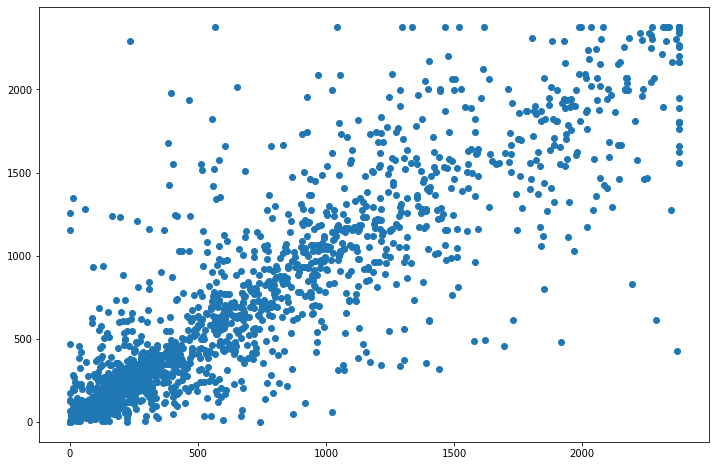

In [ ]:
plt.figure(figsize=(12,8))
plt.scatter(y_test,y_pred_dt)

***6.4.1 Hyperparameter tuning using Randomizedsearchcv For Decision Tree***
Tuning of following hyperparameter is concluded: 

*   Criteron
*   max_depth

*   min sample split





**Trial 1**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
# Tuning Parameters and model initialization
params = {'criterion':['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],'max_depth':[1,10,20,30,40,50],'min_samples_split':[2,4,6,8,10]}
regressor_dt = RandomizedSearchCV(dt, params, scoring='neg_mean_squared_error', cv=10,random_state=0)

In [ ]:
# Fitting of Model with X_train and Y_train
regressor_dt.fit(x_train,y_train)

RandomizedSearchCV(cv=10, estimator=DecisionTreeRegressor(random_state=0),
                   param_distributions={'criterion': ['squared_error',
                                                      'friedman_mse',
                                                      'absolute_error',
                                                      'poisson'],
                                        'max_depth': [1, 10, 20, 30, 40, 50],
                                        'min_samples_split': [2, 4, 6, 8, 10]},
                   random_state=0, scoring='neg_mean_squared_error')

In [ ]:
# Best parameter after trial 1
regressor_dt.best_params_

{'min_samples_split': 8, 'max_depth': 30, 'criterion': 'friedman_mse'}

In [ ]:
# Prediction on Training data
y_pred_dt_train=regressor_dt.predict(x_train)

In [ ]:
# R2 score for train
r2_train=r2_score(y_train,y_pred_dt_train)

In [ ]:
# Prediction on Test data
y_pred_dt=regressor_dt.predict(x_test)

In [ ]:
# Metric calculation for test data
dt_mse,dt_r2,dt_adj_r2=metrics(y_test,y_pred_dt,k=x_test_df.shape[1])
dt_mse,dt_r2,dt_adj_r2

(87350.0554929297, 0.7807375618481694, 0.7762654258718792)

**Trail 2:Based on distribution near to best parameter**

In [ ]:
#Tuning Parameters,model initialization and model training

params = {'criterion':['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],'max_depth':[18,19,20,21,22],'min_samples_split':[9,10,11]}
regressor_dt = RandomizedSearchCV(dt, params, scoring='neg_mean_squared_error', cv=10,random_state=0)
regressor_dt.fit(x_train,y_train)

RandomizedSearchCV(cv=10, estimator=DecisionTreeRegressor(random_state=0),
                   param_distributions={'criterion': ['squared_error',
                                                      'friedman_mse',
                                                      'absolute_error',
                                                      'poisson'],
                                        'max_depth': [18, 19, 20, 21, 22],
                                        'min_samples_split': [9, 10, 11]},
                   random_state=0, scoring='neg_mean_squared_error')

In [ ]:
# Best parameter after trial 2
regressor_dt.best_params_

{'min_samples_split': 11, 'max_depth': 18, 'criterion': 'squared_error'}

In [ ]:
# Prediction on Training data
y_pred_dt_train=regressor_dt.predict(x_train)

In [ ]:
# R2 score for train
r2_train_dt=r2_score(y_train,y_pred_dt_train)
r2_train_dt

0.9321396061219246

In [ ]:
# Prediction on Test data
y_pred_dt=regressor_dt.predict(x_test)

In [ ]:
# Metric calculation for test dat
dt_mse,dt_r2,dt_adj_r2=metrics(y_test,y_pred_dt,k=x_test_df.shape[1])
dt_mse,dt_r2,dt_adj_r2

(79265.85571181767, 0.8010301803761175, 0.7969719381343716)

***Model with best parameter***

Trial 2 best parameter are used as tuned hyperparameter for decision tree regresssor



In [ ]:
# Model Training
dt=DecisionTreeRegressor(criterion='squared_error',max_depth=18,min_samples_split=11,random_state=0)
dt.fit(x_train,y_train)
y_pred_train=dt.predict(x_train)
train_r2_dt=r2_score(y_train,y_pred_train)

In [ ]:
# Calculation of metrics for train and test data
y_pred_test=dt.predict(x_test)
dt_mse,dt_r2,dt_adj_r2=metrics(y_test,y_pred_dt,k=x_test_df.shape[1])
dt_mse,dt_r2,dt_adj_r2

(79265.85571181767, 0.8010301803761175, 0.7969719381343716)

### ***6.5.Gradient Boosting***

In [ ]:
# Model training
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor(learning_rate=0.1)
gbr.fit(x_train,y_train)

GradientBoostingRegressor()

In [ ]:
y_pred_train=gbr.predict(x_train)
r2_train_gbr=r2_score(y_train,y_pred_train)
r2_train_gbr

0.8228884915965636

In [ ]:
y_pred_gbr=gbr.predict(x_test)

In [ ]:
gbr_mse,gbr_r2,gbr_adj_r2=metrics(y_test,y_pred_gbr,k=x_test_df.shape[1])
gbr_mse,gbr_r2,gbr_adj_r2

(79183.14607646974, 0.8012377946266489, 0.797183786941295)

Hyperparameter Tuning for gradientBoostingRegressor

Tuning of following hyperparameter is concluded:

*  Loss

* Learning_rate

* max_depth

* n_estimators

* max_leaf_node



In [ ]:
params={'n_estimators':[5,10,50,100,500],'learning_rate':[0.001,0.01,1,10,100],
        'max_leaf_nodes':[10,20,40,60,80,100],'max_depth':[8,16,24,32],'max_features':['auto', 'sqrt', 'log2']}

In [ ]:
regressor_gbr = RandomizedSearchCV(gbr, params, scoring='neg_mean_squared_error', cv=5,random_state=0)

In [ ]:
regressor_gbr.fit(x_train,y_train)

/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:86: RuntimeWarning:

overflow encountered in reduce

/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_gb_losses.py:231: RuntimeWarning:

overflow encountered in square

/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:86: RuntimeWarning:

overflow encountered in reduce

/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_gb_losses.py:231: RuntimeWarning:

overflow encountered in square

/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:86: RuntimeWarning:

overflow encountered in reduce

/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_gb_losses.py:231: RuntimeWarning:

overflow encountered in square

/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_gb_losses.py:231: RuntimeWarning:

overflow encountered in square

/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_gb_losses.py:231: RuntimeWarning:

overflow encountered in square

/usr/local/lib/python3.8/d

RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(),
                   param_distributions={'learning_rate': [0.001, 0.01, 1, 10,
                                                          100],
                                        'max_depth': [8, 16, 24, 32],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'max_leaf_nodes': [10, 20, 40, 60, 80,
                                                           100],
                                        'n_estimators': [5, 10, 50, 100, 500]},
                   random_state=0, scoring='neg_mean_squared_error')

In [ ]:
regressor_gbr.best_params_

{'n_estimators': 500,
 'max_leaf_nodes': 80,
 'max_features': 'sqrt',
 'max_depth': 32,
 'learning_rate': 0.01}

In [ ]:
y_pred_train=regressor_gbr.predict(x_train)
r2_gbr_1=r2_score(y_train,y_pred_train)
r2_gbr_1

0.9386916269183041

In [ ]:
y_pred_gbrcv=regressor_gbr.predict(x_test)

In [ ]:
r2_score(y_test,y_pred_gbrcv)

0.8752852430479346

**Trial 2**: with parameters distributed around trial 1 tuned parameter 






In [ ]:
params={'n_estimators':[400,450,500,550,600],'learning_rate':[0.006,0.008,0.01,0.012,0.014],'max_leaf_nodes':[70,75,80,85],'max_depth':[27,28,29,30,31,32]}

In [ ]:
regressor_gbr_2 = RandomizedSearchCV(gbr, params, scoring='neg_mean_squared_error', cv=5,random_state=0)

In [ ]:
regressor_gbr_2.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(),
                   param_distributions={'learning_rate': [0.006, 0.008, 0.01,
                                                          0.012, 0.014],
                                        'max_depth': [27, 28, 29, 30, 31, 32],
                                        'max_leaf_nodes': [70, 75, 80, 85],
                                        'n_estimators': [400, 450, 500, 550,
                                                         600]},
                   random_state=0, scoring='neg_mean_squared_error')

In [ ]:
regressor_gbr_2.best_params_

{'n_estimators': 450,
 'max_leaf_nodes': 75,
 'max_depth': 29,
 'learning_rate': 0.014}

In [ ]:
y_pred_train_2=regressor_gbr_2.predict(x_train)

In [ ]:
r2_score(y_train,y_pred_train_2)

0.9591091663721889

In [ ]:
y_pred_gbrcv_2=regressor_gbr_2.predict(x_test)

In [ ]:
r2_score(y_test,y_pred_gbrcv)

0.8752852430479346

**Model with best parmater obtain after trial 2**

In [ ]:
new_reg=GradientBoostingRegressor(n_estimators= 100,max_leaf_nodes= 24,max_depth= 51,loss= 'squared_error',learning_rate =0.06,random_state=0)

In [ ]:
new_reg.fit(x_train,y_train)

GradientBoostingRegressor(learning_rate=0.06, max_depth=51, max_leaf_nodes=24,
                          random_state=0)

In [ ]:
y_pred_train_2=new_reg.predict(x_train)
r2_gbr_tune_train=r2_score(y_train,y_pred_train_2)
r2_gbr_tune_train

0.9051439234437167

In [ ]:
y_pred_test_2=new_reg.predict(x_test)
gbr_tune_mse,gbr_tune_r2,gbr_tune_adj_r2=metrics(y_test,y_pred_test_2,k=x_test_df.shape[1])
gbr_tune_mse,gbr_tune_r2,gbr_tune_adj_r2

(52321.65032451498, 0.8686643923287576, 0.8659856357620365)

Text(0.5, 1.0, 'Actual vs Prediction for Gradient boosting regressor')

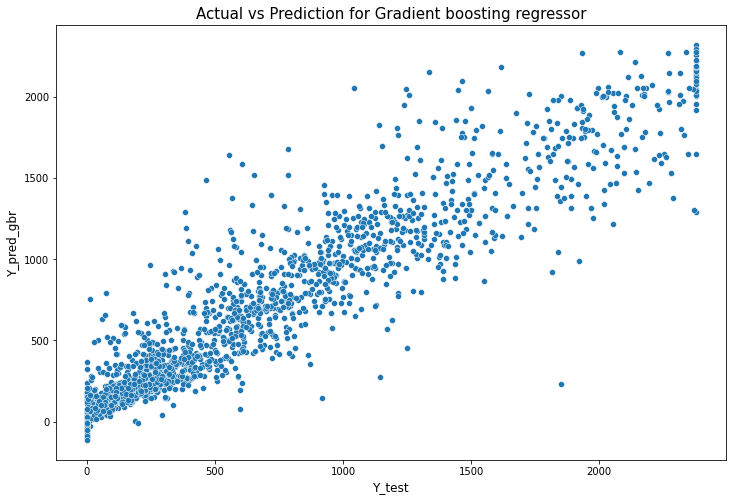

In [ ]:
fig=plt.figure(figsize=(12,8))
fig=sns.scatterplot(x=y_test,y=y_pred_test_2,palette='mako')
plt.xlabel('Y_test',fontsize=12)
plt.ylabel('Y_pred_gbr',fontsize=12)
plt.title('Actual vs Prediction for Gradient boosting regressor',fontsize=15)

In [ ]:
feat_imp_val=new_reg.feature_importances_

In [ ]:
name=[]
for i in list(x_train_df.columns):
  name.append(str(i))


In [ ]:
# Function for the feature importance visualization:
def feature_importance_visual(feature_importance_value,x_train_df,model_name):
  name=list(x_train_df.columns)
  imp_df=pd.DataFrame(feature_importance_value)
  imp_df.index=name
  imp_df.reset_index(inplace=True)
  imp_df.columns=['name','value']
  imp_df.sort_values(by='value',inplace=True)
  imp_df=imp_df[imp_df['value']>0.02]
  plt.figure(figsize=(12,8))
  fig = sns.barplot(data=imp_df,x='value', y='name', orient='h',palette="light:#5A9")
  plt.xlabel("Values",fontsize=20)
  plt.ylabel("Features",fontsize=20)
  sns.set_style("dark")
  plt.title(f"Feature Importance Visualization for {model_name}",fontsize=22)



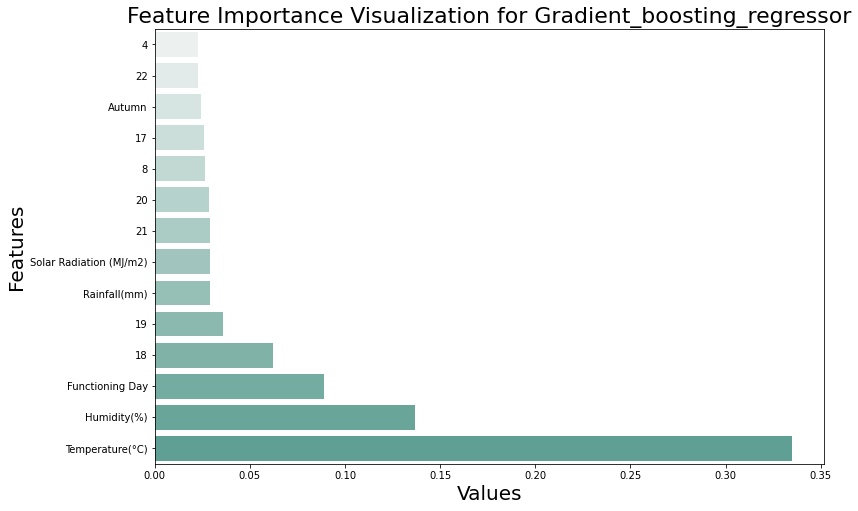

In [ ]:
feature_importance_visual(feat_imp_val,x_train_df,'Gradient_boosting_regressor')

### *6.6. Extra tree Regressor*

In [ ]:
# Model intialization with random hyper parameter
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor(n_estimators=10,max_depth=5,random_state=0)

In [ ]:
# Model Training
rfr.fit(x_train,y_train)

RandomForestRegressor(max_depth=5, n_estimators=10, random_state=0)

In [ ]:
y_pred_train=rfr.predict(x_train)

In [ ]:
y_pred_test=rfr.predict(x_test)

In [ ]:
r2_score(y_train,y_pred_train)

0.6241747056939708

In [ ]:
r2_score(y_test,y_pred_test)

0.5849016012235968

 **Hyperparamter Tuning**
**Trial 1** Hyper parameter used are as follows:


1.   criterion
2.   n_estimators
3.   max_leaf_nodes
4.   max_depth
5.   max_features



In [ ]:
# Defining the hyperparameters
params={'criterion':['squared_error', 'absolute_error', 'poisson'],'n_estimators':[100,250,500,750,1000],
        'max_leaf_nodes':[8,16,24,32],'max_depth':[3,5,10,20,50],
        'max_features':['sqrt', 'log2']}

In [ ]:
# Model initialization
regressor_rfr = RandomizedSearchCV(rfr, params, scoring='neg_mean_squared_error', cv=5,random_state=0)

In [ ]:
# Model training
regressor_rfr.fit(x_train,y_train)

RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(max_depth=5, n_estimators=10,
                                                   random_state=0),
                   param_distributions={'criterion': ['squared_error',
                                                      'absolute_error',
                                                      'poisson'],
                                        'max_depth': [3, 5, 10, 20, 50],
                                        'max_features': ['sqrt', 'log2'],
                                        'max_leaf_nodes': [8, 16, 24, 32],
                                        'n_estimators': [100, 250, 500, 750,
                                                         1000]},
                   random_state=0, scoring='neg_mean_squared_error')

In [ ]:
y_pred_train_rfr=regressor_rfr.predict(x_train)
r2_rfr_train=r2_score(y_train,y_pred_train_rfr)

In [ ]:
regressor_rfr.best_params_

{'n_estimators': 500,
 'max_leaf_nodes': 8,
 'max_features': 'sqrt',
 'max_depth': 20,
 'criterion': 'squared_error'}

In [ ]:
y_pred_test_rfr=regressor_rfr.predict(x_test)
rfr_mse,rfr_r2,rfr_adj_r2=metrics(y_test,y_pred_test_rfr,k=x_train_df.shape[1])
rfr_mse,rfr_r2,rfr_adj_r2

(188614.8149831625, 0.5265470185292316, 0.5168903434992334)

**Trial 2: with parameters distributed around trial 1 tuned parameter**

In [ ]:
params2={'criterion':['squared_error', 'absolute_error', 'poisson'],'n_estimators':[450,475,500,525,550],
        'max_leaf_nodes':[7,8,9],'max_depth':[18,19,20,21,22],
        'max_features':['sqrt', 'log2']}

In [ ]:
regressor_rfr = RandomizedSearchCV(rfr, params2, scoring='neg_mean_squared_error', cv=5,random_state=0)

In [ ]:
regressor_rfr.fit(x_train,y_train)

RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(max_depth=5, n_estimators=10,
                                                   random_state=0),
                   param_distributions={'criterion': ['squared_error',
                                                      'absolute_error',
                                                      'poisson'],
                                        'max_depth': [18, 19, 20, 21, 22],
                                        'max_features': ['sqrt', 'log2'],
                                        'max_leaf_nodes': [7, 8, 9],
                                        'n_estimators': [450, 475, 500, 525,
                                                         550]},
                   random_state=0, scoring='neg_mean_squared_error')

In [ ]:
y_pred_train_rfr=regressor_rfr.predict(x_train)
r2_rfr_train=r2_score(y_train,y_pred_train_rfr)

In [ ]:
y_pred_test_rfr=regressor_rfr.predict(x_test)
rfr_mse,rfr_r2,rfr_adj_r2=metrics(y_test,y_pred_test_rfr,k=x_train_df.shape[1])
rfr_mse,rfr_r2,rfr_adj_r2

(177890.65756926054, 0.5534663477549184, 0.5443587266426936)

In [ ]:
regressor_rfr.best_params_

{'n_estimators': 525,
 'max_leaf_nodes': 9,
 'max_features': 'log2',
 'max_depth': 21,
 'criterion': 'absolute_error'}

***Model with best parmater obtain after trial 2***

In [ ]:
rfr=RandomForestRegressor(n_estimators=550,max_depth=22,max_leaf_nodes=9,max_features='sqrt',criterion='squared_error')

In [ ]:
rfr.fit(x_train,y_train)

RandomForestRegressor(max_depth=22, max_features='sqrt', max_leaf_nodes=9,
                      n_estimators=550)

In [ ]:
y_pred_train=rfr.predict(x_train)
r2_train_rfr=r2_score(y_train,y_pred_train)
r2_train_rfr

0.5595286431908852

In [ ]:
y_pred_test_rfr=rfr.predict(x_test)
rfr_mse,rfr_r2,rfr_adj_r2=metrics(y_test,y_pred_test_rfr,k=x_train_df.shape[1])
rfr_mse,rfr_r2,rfr_adj_r2

(176854.6254119201, 0.5560669521339339, 0.5470123736518171)

In [ ]:
feat_imp_val=rfr.feature_importances_

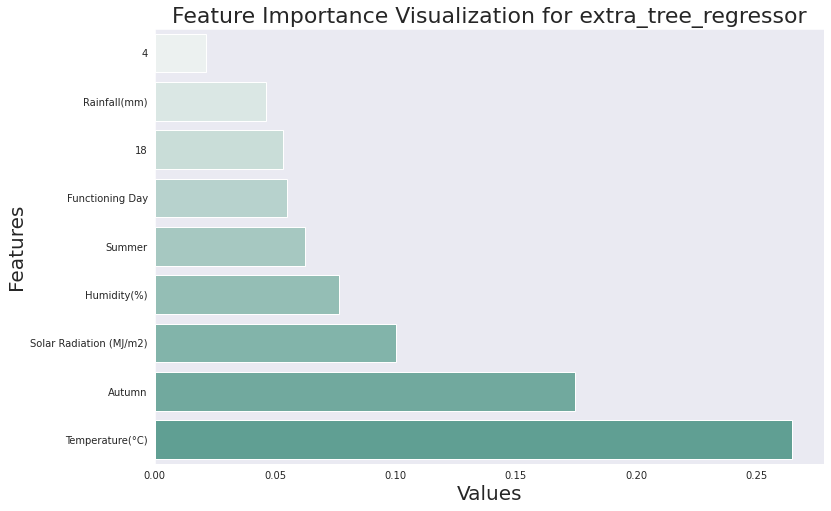

In [ ]:
feature_importance_visual(feat_imp_val,x_train_df,'extra_tree_regressor')

## ***7. Metric comparision and selection of best model based on performance*** 

In [ ]:
model_list=['LR','Ridge','Lasso','DecisionTree','Gradient Boosting','RandomForest']

train_r2_values=np.array([train_r2_lr,train_r2_ridge,train_r2_lasso,train_r2_dt,r2_gbr_tune_train,r2_train_rfr])

r2_test=np.array([lr_r2,ridge_r2,lasso_r2,dt_r2,gbr_tune_r2,rfr_r2])

mse_test=np.array([lr_mse,ridge_mse,lasso_mse,dt_mse,gbr_tune_mse,rfr_mse])

adj_r2_test=np.array([lr_adj_r2,ridge_adj_r2,lasso_adj_r2,dt_adj_r2,gbr_tune_adj_r2,rfr_adj_r2])

In [ ]:
metric_array=[train_r2_values,mse_test,r2_test,adj_r2_test]

In [ ]:
metric_df=pd.DataFrame(data=metric_array,columns=['LR','Ridge','Lasso','DecisionTree','Gradient Boosting','RandomForest']).T
metric_df.reset_index(inplace=True)
metric_df.columns=['Model','Train R2','Test MSE','Test R2','Test Adj R2']
metric_df.sort_values(by='Test R2',inplace=True)
metric_df

,Model,Train R2,Test MSE,Test R2,Test Adj R2
5,RandomForest,0.559529,176854.625412,0.556067,0.547012
0,LR,0.684182,127915.851977,0.678911,0.672362
1,Ridge,0.684182,127915.838588,0.678911,0.672362
2,Lasso,0.684182,127915.568931,0.678912,0.672363
3,DecisionTree,0.932140,79265.855712,0.801030,0.796972
4,Gradient Boosting,0.905144,52321.650325,0.868664,0.865986


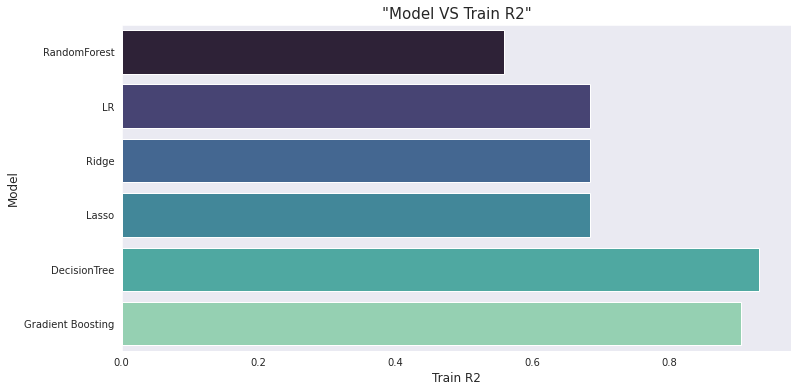

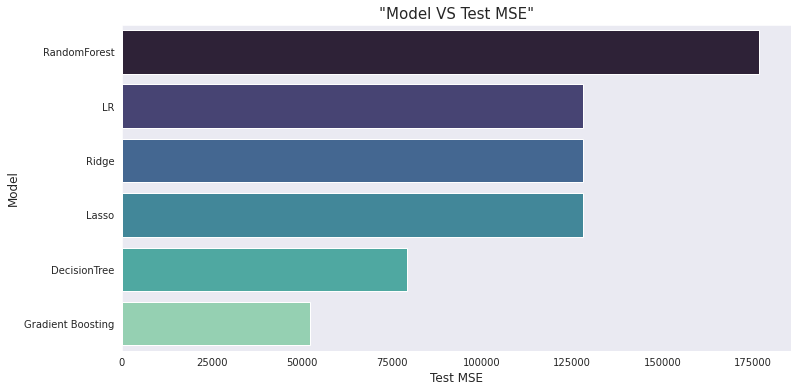

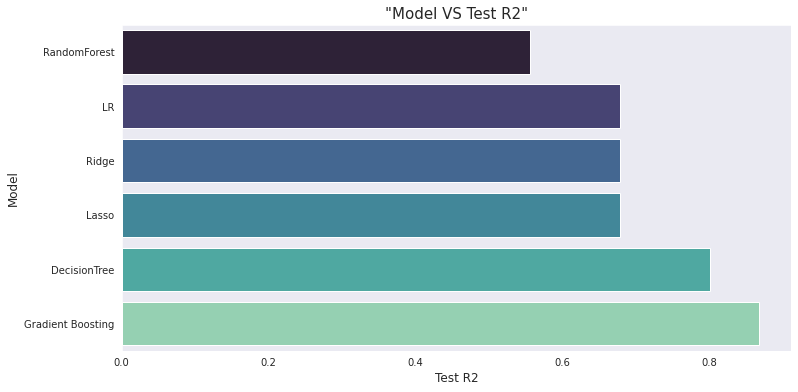

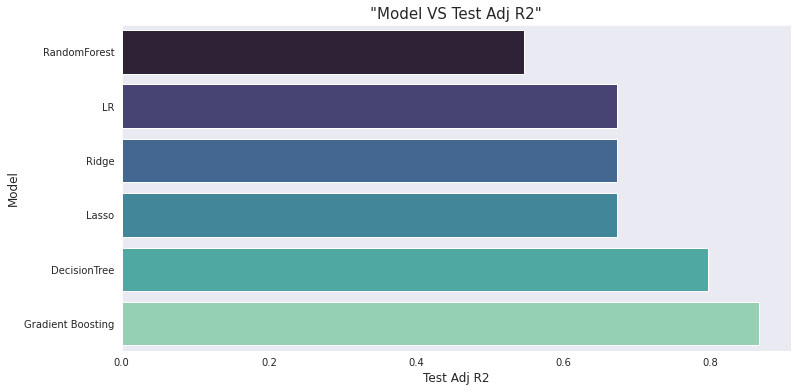

In [ ]:
col=list(metric_df.columns)[1:]
for i in col:
  j=len(col)
  fig, ax = plt.subplots(figsize=(12,6))
  ax=sns.barplot(data=metric_df,x=f'{i}',y='Model',orient='h',palette="mako")
  plt.xlabel(i,fontsize=12)
  plt.ylabel('Model',fontsize=12)
  
  plt.title(f'"Model VS {i}"',fontsize=15)
  



---



---


***Since Gradient boosting regressor has low mean square error where as high r2 and adjusted r2 for test data in comparison to other models, therefore to predict the bike prediction count we will will use gradient boosting regressor model.***


---



---



## ***8. Bike Count Prediction***





In [ ]:
# Function to identify the season
def Seasons_(month):
  if 3<=month<=5:
    seasons='Spring'
  elif 6<=month<=8:
    Seasons='Summer'
  elif 9<=month<=11:
    Seasons='Autumn'
  else:
    Seasons='Winter'
  return Seasons

In [ ]:
# Function to enter the new data for bike prediction count
def current_data():
  from datetime import datetime
  import pytz
  Temperature=float(input('Enter the Temperature(K)'))
  Snowfall=float(input('Enter the Snowfall(mm)'))
  rainfall=float(input('Enter the rainfall(cm)'))
  visibility=float(input('Enter the visibility'))
  Solar_radiation=float(input('Enter the Solar radiation'))
  Windspeed=float(input('Enter the Wind speed (m/s)'))
  Humidity=float(input('Enter the Humidity(%)'))
  Holiday=str(input('If today is holiday then enter "Holiday" else "No Holiday" '))
  Functioning_Day= str(input('If today is functioning day then enter "Yes" else "No" '))
  index=0
  current=datetime.now(pytz.timezone('Asia/Kolkata'))
  hour=current.hour
  month=current.month
  Seasons=Seasons_(month)
  x_data=[hour, Temperature, Humidity, Windspeed, visibility,
          Solar_radiation, rainfall, Snowfall, Seasons, Holiday, Functioning_Day]
  return x_data

In [ ]:
# Function to convert new data to dataframe
def current_df(data):
  current_df=pd.DataFrame(data=x_data).T
  current_df.columns=['Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)',
                      'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons', 'Holiday', 'Functioning Day']
  return current_df

In [ ]:
# Function to apply preprocessing,model training and prediction dataframe
def bike_count_pred(data):
  df_new=current_df(data)
  new=col_trans.transform(df_new)
  bike_count=gbr.predict(new)
  return int(np.floor(bike_count))

In [ ]:
x_data=current_data()
x_data

In [ ]:
bike_count_pred(x_data)